<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Bivariate Analysis

### Initializations

Es werden die benötigten Bibliotheken eingebunden und für Variationsmöglichkeiten bei der Ausgabe wird class color definiert.   


In [1]:
# Bibliotheken einbinden
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
df = pd.read_pickle('exchange/hr_01_cleaned_train.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
satisfactionLevel       10000 non-null float64
yearsSinceEvaluation    10000 non-null float64
numberOfProjects        10000 non-null int64
averageMonthlyHours     10000 non-null int64
yearsAtCompany          10000 non-null int64
workAccident            10000 non-null category
hasLeftCompany          10000 non-null category
gotPromotion            10000 non-null category
department              10000 non-null category
salary                  10000 non-null category
dtypes: category(5), float64(2), int64(3)
memory usage: 440.3 KB


### Category Attributes vs. Has Left Company


#### Zusammenhangs der Attribute mit Categories gegenüber dem Verlassen der Firma

C:\Users\Lukas.Oldach\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


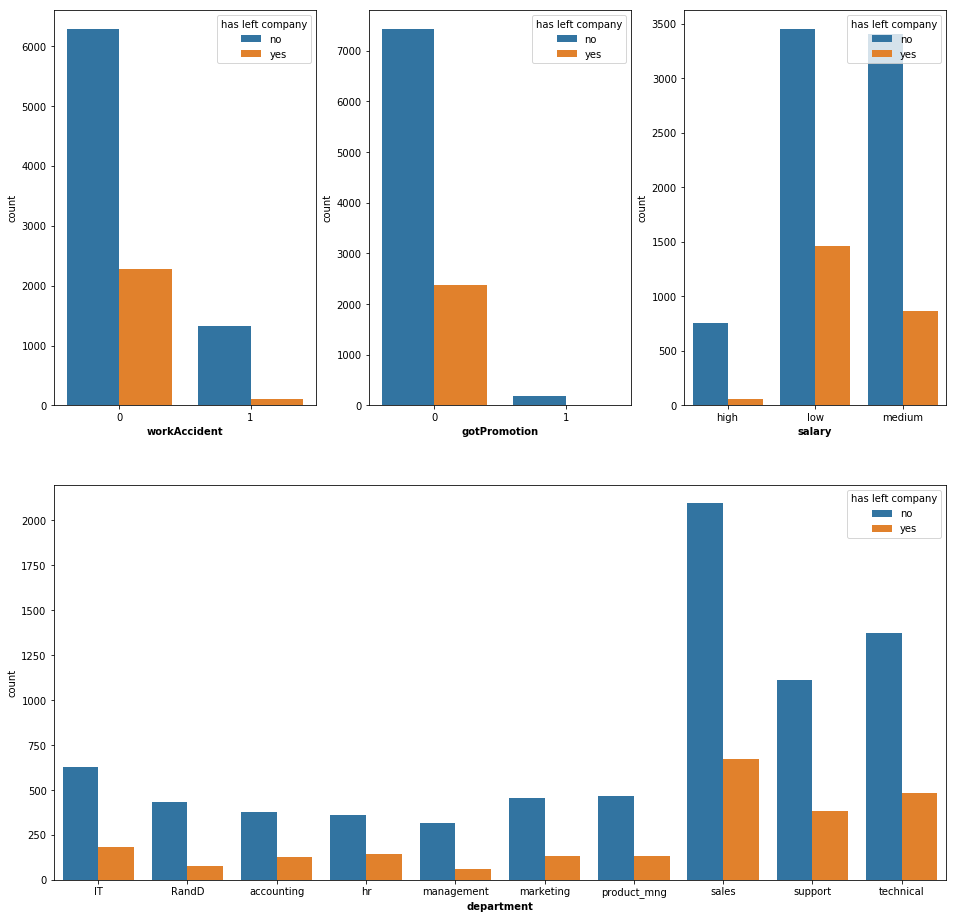

In [4]:
# Visualisierung Countplot
count_number_colums = df.select_dtypes(include=['category']).columns.size - 1
f, a = plt.subplots(2, 3, figsize=(16,16))
a = a.ravel()
for idx, col in enumerate(df.select_dtypes(include=['category']).drop(['department', 'hasLeftCompany'], axis=1)):
    sns.countplot(x=col, hue='hasLeftCompany', data=df, ax=a[idx])
    a[idx].set_xlabel(col, weight='bold')
    a[idx].legend(title='has left company', labels=['no', 'yes'])
a = plt.subplot2grid((2, 3), (1, 0), colspan=3)
a.set_xlabel('department', weight='bold')
sns.countplot(x='department', hue='hasLeftCompany', data=df, ax=a)
a.legend(title='has left company', labels=['no', 'yes']);

#### Zusammenhangs der Attribute mit Categories gegenüber dem Verlassen der Firma, skaliert auf 100%


Die 100% Skalierung ermöglich eine bessere visuelle Vergleichbarkeit.

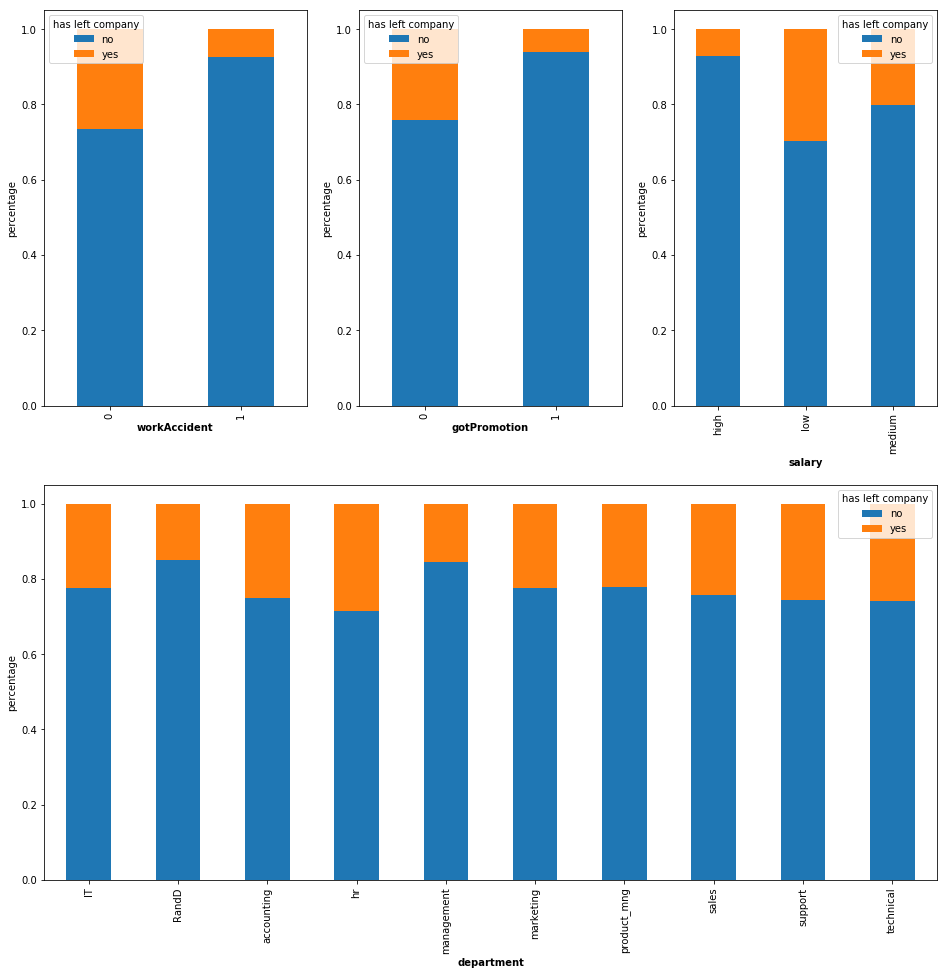

In [5]:
# Visualisierung Countplot 100%
count_number_colums = df.select_dtypes(include=['category']).columns.size - 1
f, a = plt.subplots(2, 3, figsize=(16,16))
a = a.ravel()
for idx, col in enumerate(df.select_dtypes(include=['category']).drop(['department', 'hasLeftCompany'], axis=1)):
    ct = pd.crosstab(df[col], df['hasLeftCompany'])
    ct = ct.div(ct.sum(axis=1), axis=0)
    ct.plot.bar(stacked=True, ax=a[idx])
    a[idx].set_xlabel(col, weight='bold')
    a[idx].legend(loc='lower right', title='hasLeftCompany')
    a[idx].set_ylabel('percentage')
    a[idx].legend(title='has left company', labels=['no', 'yes'])
a = plt.subplot2grid((2, 3), (1, 0), colspan=3)
ct = pd.crosstab(df['department'], df['hasLeftCompany'])
ct = ct.div(ct.sum(axis=1), axis=0)
ct.plot.bar(stacked=True, ax=a)
a.set_xlabel('department', weight='bold')
a.legend(loc='lower right', title='hasLeftCompany')
a.set_ylabel('percentage')
a.legend(title='has left company', labels=['no', 'yes']);

### Number Attributes vs. Has Left Company

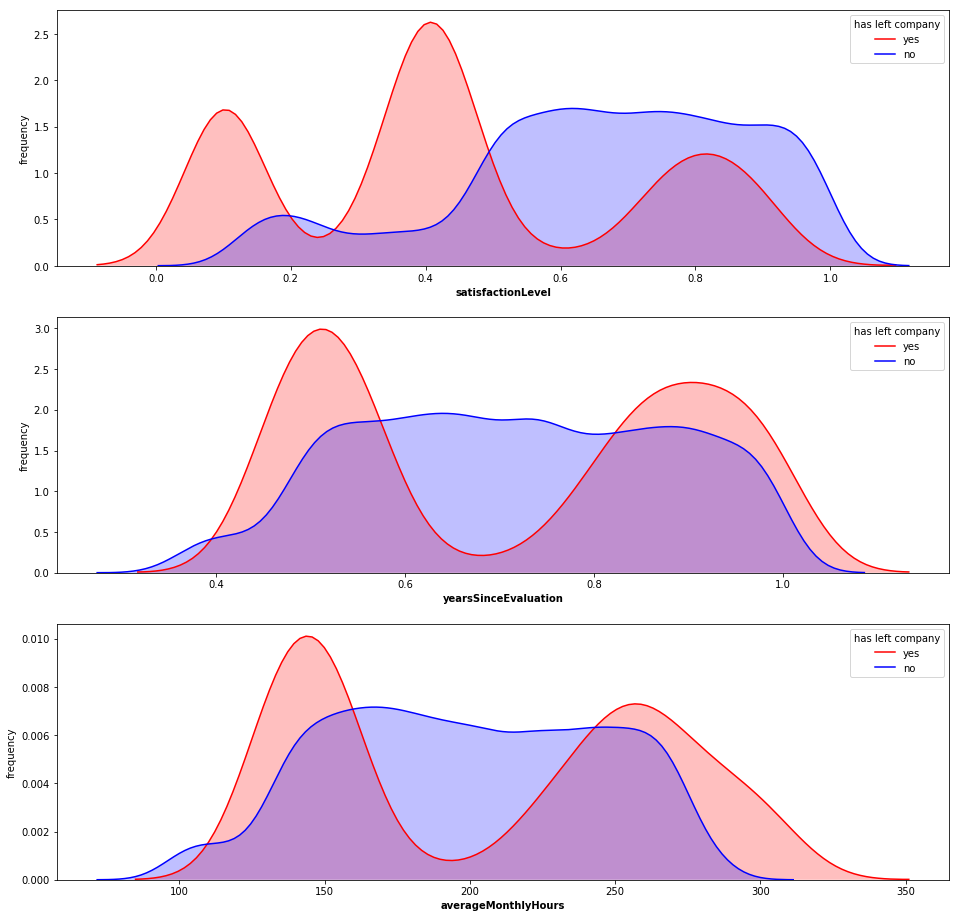

In [6]:
# Visualisierung des Zusammenhangs von satisfaction, evaluation, monthlyHours gegenüber dem Verlassen der Firma
f, a = plt.subplots(3, 1, figsize=(16,16))
a = a.ravel()
for idx, col in enumerate(['satisfactionLevel', 'yearsSinceEvaluation', 'averageMonthlyHours']):
    sns.kdeplot(df.loc[(df['hasLeftCompany'] == 1), col], color='r', shade=True, label='has left company', ax=a[idx])
    sns.kdeplot(df.loc[(df['hasLeftCompany'] == 0), col], color='b', shade=True, label='has not left company', ax=a[idx])
    a[idx].set(ylabel='frequency')
    a[idx].set_xlabel(col, weight='bold')
    a[idx].legend(title='has left company', labels=['yes', 'no'])

### Detailierte Betrachtung von numberOfProjects und yearsAtCompany
Betrachtung der Werte absolut und relativ.


C:\Users\Lukas.Oldach\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


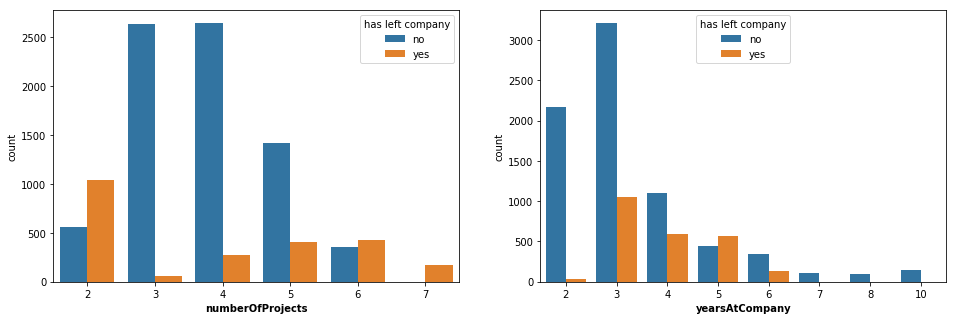

In [10]:
# Visualisierung Countplot absolut
f, a = plt.subplots(1, 2, figsize=(16,5))
a = a.ravel()
for idx, col in enumerate(['numberOfProjects', 'yearsAtCompany']):
    sns.countplot(x=col, hue='hasLeftCompany', data=df, ax=a[idx])
    a[idx].set_xlabel(col, weight='bold')
    a[idx].legend(title='has left company', labels=['no', 'yes'])

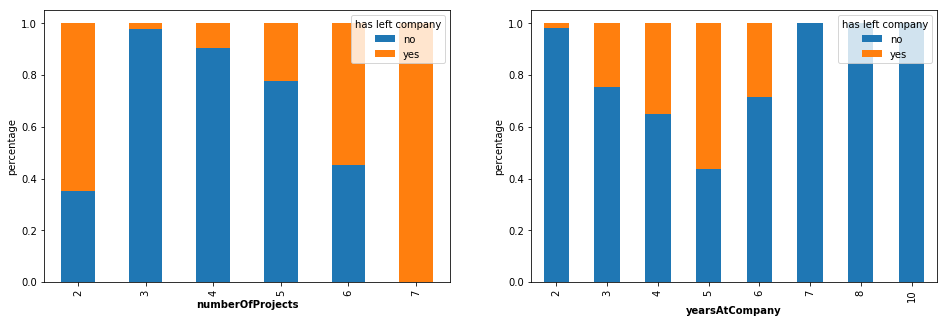

In [8]:
# Visualisierung Countplot relativ
f, a = plt.subplots(1, 2, figsize=(16,5))
a = a.ravel()
for idx, col in enumerate(['numberOfProjects', 'yearsAtCompany']):
    ct = pd.crosstab(df[col], df['hasLeftCompany'])
    ct = ct.div(ct.sum(axis=1), axis=0)
    ct.plot.bar(stacked=True, ax=a[idx])
    a[idx].set_xlabel(col, weight='bold')
    a[idx].set_ylabel('percentage')
    a[idx].legend(loc='upper right', title='hasLeftCompany')
    a[idx].legend(title='has left company', labels=['no', 'yes'])

#### Fazit zu numberOfProjects und yearsAtCompany

Zwischen numberOfProjects und yearsAtCompany besteht nur eine leichte lineare Korrelation von 0.1917.